In [1]:
# Import all required libraries

import os
import langchain
import openai
import sys
import numpy as np
import sklearn
import pandas as pd

In [2]:
# Get OpenAI API key from .env file
 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key = os.environ['OPENAI_API_KEY']

In [19]:
# Select some random sentences for demonstrating embeddings process
# Select all lines and Ctr + /

in_1 = "Kids play in the park"
in_2 = "An apple is red"
in_3 = "Fruites like apple, oranges are good for health, like"
in_4 = "An apple a day keeps a doctor away"
in_5 = "New curry restaurant aims to please!"
in_6 = "I like winters and snow"
in_7 = "A new revolution is taking place" 

# in_1 = "generative AI rapidly adopted is in the design of physical products and services"
# in_2 = "multi mode AI models will become popular"
# in_3 = "happy friday to you"
# in_4 = "keep calm and carry on"
# in_5 = "US black friday sales were higher about 5%"
# in_6 = "US ecommerce sales are increasingly becoming higher"
# in_7 = "Morning run is a perfect way to start your day"


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [20]:
# Setup embedding model using langchain. It can also be setup by creaing OpenAI client and calling embedding function. 

from langchain.embeddings import OpenAIEmbeddings
embedding_model = OpenAIEmbeddings(model="text-embedding-ada-002")

In [22]:
# Collect all embeddings in to an array and pass this to a numpy array

embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.embed_query(input_text) 
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [23]:
# Find out the array shape, text-embedding-ada-002 generates embeddings with 1536 dimensions

embeddings_array.shape

(7, 1536)

In [24]:
# Print any one embedding from embedding array
embeddings_array[0]

array([ 0.00879476, -0.00110241,  0.00707258, ..., -0.01724631,
       -0.00529218, -0.00051711])

In [25]:
# We need to reduce dimensions by using PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
PCA_Model = PCA(n_components=2)
PCA_Model.fit(embeddings_array)
twoDimension = PCA_Model.transform(embeddings_array)

In [26]:
# Inspect dimensions and print the new array 

print(twoDimension.shape)

twoDimension

(7, 2)

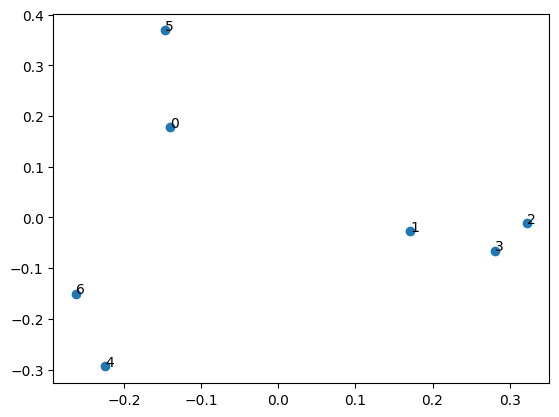

In [28]:
# Plot embeddings using matplotlin.pyplot

import matplotlib.pyplot as plt

n = np.arange(len(input_text_lst_news))

fig, ax = plt.subplots()

ax.scatter(twoDimension[:,0], twoDimension[:,1])


for i, txt in enumerate(n):
    ax.annotate(txt, (twoDimension[:,0], twoDimension[:,1]))